In [1]:
import os, pickle, json, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
from visualization_utils import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
ROOT_DIR = "/Users/linhongl/Downloads/topic_output" # I ran this notebook on my own machine
# ROOT_DIR should be the directory containing the {model}_{dataset}_{experiment_id}_0_beta.pickle file

# Reproducing all-topic and single-topic heatmaps in the paper

In [3]:
def plot_topic_heatmaps(dataset, model, experiment_id, root_dir=None, vis_output_dir="plots", action_list=None):
    '''
        Action list specify plots that the user would like to generate. 
        If None, default to all topic heatmap.
    
    '''

    if root_dir is None:
        root_dir = os.path.join("dataset", dataset, model, experiment_id)

    outer_iter_i = 0
    use_distributions = not model.startswith("survscholar")
    saved_outputs_fname = "{}_{}_{}_{}_beta.pickle".format(model, dataset, experiment_id, outer_iter_i)

    with open(os.path.join(root_dir, saved_outputs_fname), "rb") as file:
        beta_info = pickle.load(file)

    if use_distributions: # use topic_deviations for survscholar
        vocab_probs = beta_info['topic_distributions']
    else:
        vocab_probs = beta_info['topic_deviations']
    
    n_topics = vocab_probs.shape[0]
    n_vocab = vocab_probs.shape[1]
    print("Topic output loaded: {} topics, {} vocabularies".format(n_topics, n_vocab))
    
    if dataset == "Ich": # Ich has its own set of visualization functions

        if action_list is None or "all_topic_heatmaps" in action_list:
            heatmap_plot_topic_reordered_ich(model, dataset, vocab_probs, beta_info['beta'], beta_info['vocabulary'],
                                             saveto=os.path.join(vis_output_dir, "{}_{}_{}_{}".format(model, dataset, experiment_id, outer_iter_i)),
                                             logscale=True, clip_negative=True, show_plot=False) # Ich does not support show plot 
        if action_list is not None and "single_topic_heatmaps" in action_list:
            heatmap_plot_single_topic(model, dataset, vocab_probs, beta_info['beta'], beta_info['vocabulary'],
                                      saveto=os.path.join(vis_output_dir, "{}_{}_{}_{}".format(model, dataset, experiment_id, outer_iter_i)))
        if action_list is not None and "all_topic_printouts" in action_list:
            print_out_fname = os.path.join(vis_output_dir, "{}_{}_{}_{}_topwordsbytopic.txt".format(model, dataset, experiment_id, outer_iter_i)) 
            print_top_words(vocab_probs, beta_info['beta'], beta_info['vocabulary'], print_out_fname)
        
    else:
        
        if action_list is None or "all_topic_heatmaps" in action_list:
            heatmap_plot_topic_reordered(model, dataset, vocab_probs, beta_info['beta'], beta_info['vocabulary'],
                                         saveto=os.path.join(vis_output_dir, "{}_{}_{}_{}".format(model, dataset, experiment_id, outer_iter_i)),
                                         logscale=True, clip_negative=True, show_plot=action_list is None or len(action_list) == 1)
        if action_list is not None and "single_topic_heatmaps" in action_list:
            heatmap_plot_single_topic(model, dataset, vocab_probs, beta_info['beta'], beta_info['vocabulary'],
                                      saveto=os.path.join(vis_output_dir, "{}_{}_{}_{}".format(model, dataset, experiment_id, outer_iter_i)))
        if action_list is not None and "all_topic_printouts" in action_list:
            print_out_fname = os.path.join(vis_output_dir, "{}_{}_{}_{}_topwordsbytopic.txt".format(model, dataset, experiment_id, outer_iter_i)) 
            print_top_words(vocab_probs, beta_info['beta'], beta_info['vocabulary'], print_out_fname)


### Example: all-topic heatmaps for SUPPORT_Cancer

Topic output loaded: 3 topics, 52 vocabularies


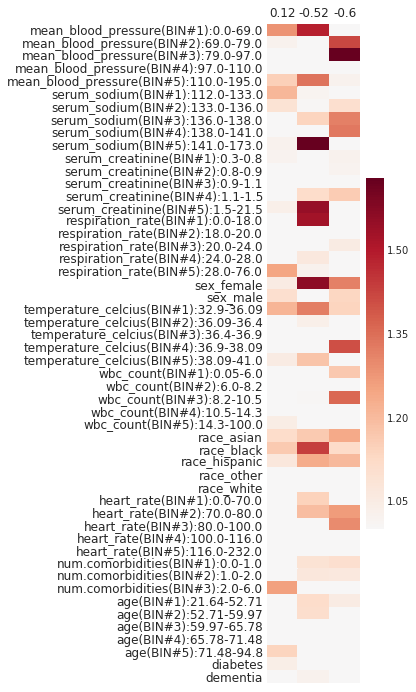

In [4]:
plot_topic_heatmaps("SUPPORT_Cancer", "survscholar_linear", "bootstrap_predictions_3_explain", ROOT_DIR,
                    action_list=["all_topic_heatmaps"])

### Example: other actions for SUPPORT_Cancer
Modify the action list to contain visualizations you want to plot. The following will save all-topic heatmaps, single-topic heatmaps, and all-topic printouts locally.

In [5]:
plot_topic_heatmaps("SUPPORT_Cancer", "survscholar_linear", "bootstrap_predictions_3_explain", ROOT_DIR,
                    action_list=["all_topic_heatmaps", "single_topic_heatmaps", "all_topic_printouts"])

Topic output loaded: 3 topics, 52 vocabularies
